# Employee Attrition

## Problem Statement
- We Want to predict who among our employees is likely to leave

In [52]:
#Import packages
import pandas as pd

In [53]:
df=pd.read_csv("C:/Users/VARATHAMOHAN/StreamLit_Files/streamlit_emp_pred-main/streamlit_emp_pred-main/emp_analytics.csv")

In [54]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [55]:
df.shape

(14999, 10)

In [56]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


satisfaction_Level:
Satisfaction level of employee in percentage. 100% or 1 is very satisfied. 0% or 0 is not satisfied

Last_evalution:
Time from last evalution in years

number_project
Number of projects an employee is working on

average monthly_hours
Average hours worked by employee in last 3 months

time_spend_company
Time spend my employee commuting to office

Work_accident
If the employee was involved in a work accident

Left 
If the employee has left the company

Promotion_in_last_5_yrs
If the employee has a promotion in past 5 years

Department
Department employee is working in

Salary

## Feature Engineering

In [58]:
df.groupby('left').mean()

C:\Users\VARATHAMOHAN\AppData\Local\Temp\ipykernel_13112\588011459.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [59]:
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [60]:
pd.get_dummies(df.salary)

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [61]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [62]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary','left']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left
0,0.38,157,0,low,1
1,0.80,262,0,medium,1
2,0.11,272,0,medium,1
3,0.72,223,0,low,1
4,0.37,159,0,low,1


In [63]:
subdf.columns

Index(['satisfaction_level', 'average_montly_hours', 'promotion_last_5years',
       'salary', 'left'],
      dtype='object')

In [64]:
salaries_dummies=pd.get_dummies(subdf.salary,prefix="salary")

In [65]:
salaries_dummies

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [66]:
##concatenation - merge columns
df=pd.concat([subdf,salaries_dummies],axis='columns')

In [67]:
df.sample(20)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left,salary_high,salary_low,salary_medium
4625,0.78,260,0,medium,0,0,0,1
8550,0.99,183,0,low,0,0,1,0
3491,0.83,226,0,low,0,0,1,0
4750,0.15,238,0,medium,0,0,0,1
14364,0.40,155,0,low,1,0,1,0
3739,0.51,147,0,medium,0,0,0,1
12082,0.79,139,1,low,1,0,1,0
10904,0.58,168,0,medium,0,0,0,1
14824,0.81,243,0,medium,1,0,0,1
10133,0.57,142,0,medium,0,0,0,1


Now we need to remove salary column which is text data. It is already replaced by dummy variables so we can safely remove it

In [68]:
df.drop('salary',inplace=True,axis='columns')

In [69]:
df.sample(5)

,satisfaction_level,average_montly_hours,promotion_last_5years,left,salary_high,salary_low,salary_medium
2194,0.83,162,0,0,0,1,0
5327,0.65,266,0,0,0,0,1
14483,0.81,270,0,1,0,0,1
8081,0.77,241,0,0,0,0,1
11418,0.75,237,0,0,0,1,0


In [70]:
X=df.drop('left',axis='columns')


In [71]:
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [72]:
y=df[['left']]

In [73]:
y

,left
0,1
1,1
2,1
3,1
4,1
...,...
14994,1
14995,1
14996,1
14997,1


In [74]:
y.value_counts()

left
0       11428
1        3571
dtype: int64

## Imbalanced dataset

## SMOTE -Synthetic Minority Oversampling Technique

In [75]:
### Install
#!pip install imbalanced-learn

In [76]:
from imblearn.over_sampling import SMOTE

In [77]:
sm=SMOTE(random_state=42)

In [78]:
X,y=sm.fit_resample(X,y)

In [79]:
y.value_counts()

left
0       11428
1       11428
dtype: int64

In [80]:
y

,left
0,1
1,1
2,1
3,1
4,1
...,...
22851,1
22852,1
22853,1
22854,1


In [81]:
X

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.380000,157,0,0,1,0
1,0.800000,262,0,0,0,1
2,0.110000,272,0,0,0,1
3,0.720000,223,0,0,1,0
4,0.370000,159,0,0,1,0
...,...,...,...,...,...,...
22851,0.100000,268,0,0,1,0
22852,0.422742,277,0,0,0,1
22853,0.740000,222,0,0,1,0
22854,0.436711,145,0,0,1,0


In [82]:
y.shape

(22856, 1)

In [83]:
X.shape

(22856, 6)

### Split Dataset

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [85]:
X_train.shape

(15999, 6)

In [86]:
y_train.shape

(15999, 1)

In [87]:
X_test.shape

(6857, 6)

In [88]:
y_test.shape

(6857, 1)

In [89]:
y_test

,left
9500,0
16219,1
4564,0
3013,0
8869,0
...,...
8288,0
13660,0
18965,1
9770,0


In [90]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [91]:
model.fit(X_train, y_train)

C:\Users\VARATHAMOHAN\anaconda3\envs\streamlit\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\VARATHAMOHAN\anaconda3\envs\streamlit\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [92]:
y_pred=model.predict(X_test)

In [93]:
y_pred

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [94]:
model.score(X_test,y_test)

0.7215983666326382

Our model is 73% accurate

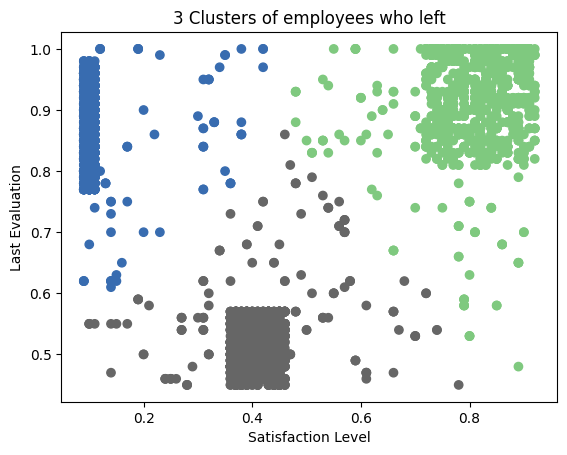

In [95]:
import matplotlib.pyplot as plt # for plotting graphs
#import module
from sklearn.cluster import KMeans

data =pd.read_csv("C:/Users/VARATHAMOHAN/StreamLit_Files/streamlit_emp_pred-main/streamlit_emp_pred-main/emp_analytics.csv")

# Filter df
left_emp =  data[['satisfaction_level', 'last_evaluation']][data.left == 1]

# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

# Add new column "label" annd assign cluster labels.
left_emp['label'] = kmeans.labels_

# Draw scatter plot
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()

## Evaluate Errors

In [96]:
from sklearn.metrics import classification_report

In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.73      0.72      3439
           1       0.72      0.71      0.72      3418

    accuracy                           0.72      6857
   macro avg       0.72      0.72      0.72      6857
weighted avg       0.72      0.72      0.72      6857



In [98]:
#confusion Matrix
from sklearn.metrics import confusion_matrix

In [99]:
cm=confusion_matrix(y_test,y_pred)

In [100]:
cm

array([[2507,  932],
       [ 977, 2441]], dtype=int64)

In [101]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7215983666326382
Precision: 0.7236881114734658
Recall: 0.7141603276770041


In [102]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("C:/Users/VARATHAMOHAN/StreamLit_Files/streamlit_emp_pred-main/streamlit_emp_pred-main/emp-model.pkl","rb")
pickle.dump(model, pickle_out)
pickle_out.close()